# <올리스트 데이터 분석 전처리 >

product dataset & items
'data\\olist_order_items_dataset.csv'
'data\\olist_products_dataset.csv'
1. 시간 
- 카테고리별 인기상품

2.지역
- 카테고리별 인기상품

## 라이브러리 로드

In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## 폰트 로드

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

## 데이터로드

In [4]:
import glob

In [5]:
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [6]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

In [7]:
# 모든 컬럼 나오게 조정 
pd.options.display.max_columns = None

In [8]:
# 하단 두개의 데이터셋은 병합에서 제외. 일단 고객 분석이 먼저니까 
# df_geolocation = pd.read_csv(path[1])
# df_sellers = pd.read_csv(path[7])

In [9]:
# import 한 데이터를 merge 하기 
# merge 해주는 이유는 merge 함수는 두 데이터 프레임을 각 데이터에 존재하는 고유값(key) 기준으로 병합할 때 사용한다.
# pd.merge(df_left, df_right, how='inner', on=None)이 default 
# on=None은 두 데이터의 공통열이름(key값) 기준으로 innerjoin  한다는 의미임 
# how = 'outer' 옵션이 붙으면 key 값기준으로 합치되 어느 한쪽에라도 없는 데이터가 있는 경우 NAN 값이 지정된다. 

In [10]:
df = df_customers.merge(df_orders, on = 'customer_id', how = 'left')
df = df.merge(df_items, on ='order_id', how = 'outer')
df = df.merge(df_payments, on ='order_id', how = 'outer', validate ='m:m')
df = df.merge(df_reviews, on ='order_id', how ='outer')
df = df.merge(df_products, on ='product_id', how ='outer')
df = df.merge(df_category, on ='product_category_name', how ='outer')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  order_item_id                 

In [12]:
df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
35577,96e58fd0928ffbeb0a2fca4506a24e5e,e140ef0b7ace7d9de0fda84a537aae85,2322,sao paulo,SP,cd0589dd69b11dbb8ca5adbe3fb753e6,delivered,2018-07-12 21:30:21,2018-07-12 21:44:00,2018-07-13 14:47:00,2018-07-15 13:04:07,2018-07-24 00:00:00,1.0,a19b6951c75da43aad691622dd2f6abe,1025f0e2d44d7041d6cf58b6550e0bfa,2018-07-18 21:44:00,35.00,9.00,1.0,credit_card,3.0,132.00,54879672d0e3abe711f63b3dc014a905,5.0,Mais q pontual,"Fiquei super contente , chegou antes do prazo ...",2018-07-16 00:00:00,2018-07-16 16:32:08,moveis_decoracao,44.0,789.0,1.0,650.0,20.0,35.0,20.0,furniture_decor
99102,4cf87362654eb863bfe2d0544539cf79,9830142fb807d072f7d8171ab69833ad,29980,pinheiros,ES,5fd9a69139ba87e71880fd5936171fe9,delivered,2017-10-28 11:29:16,2017-10-28 11:45:11,2017-10-31 14:52:06,2017-11-08 21:08:54,2017-11-23 00:00:00,1.0,165f86fe8b799a708a20ee4ba125c289,7ddcbb64b5bc1ef36ca8c151f6ec77df,2017-11-03 11:45:11,146.99,21.52,1.0,credit_card,2.0,168.51,8c4fcacb73e9a857dce6f1290a111750,4.0,NaN,NaN,2017-11-09 00:00:00,2017-11-09 22:00:29,cool_stuff,40.0,1456.0,1.0,2425.0,29.0,30.0,19.0,cool_stuff
33087,67198606d2a581bfeba1a019e45ab276,c9f2898089cc985c092323f1fa128c6a,13224,varzea paulista,SP,ea88ef80cceb79ad79ed25ed33d0b7d9,delivered,2018-05-03 10:09:55,2018-05-03 10:57:05,2018-05-08 14:45:00,2018-05-11 22:46:21,2018-06-04 00:00:00,1.0,b3716b1e3576d3f2f246139d80c67d6a,4a3ca9315b744ce9f8e9374361493884,2018-05-15 10:57:05,41.80,12.79,1.0,credit_card,2.0,54.59,d72415f76d1b76060f8d5ae2728c6588,5.0,NaN,NaN,2018-05-12 00:00:00,2018-05-13 02:17:43,brinquedos,45.0,215.0,1.0,200.0,45.0,15.0,35.0,toys
118109,69348267a5b2868e605dcfb793aac39a,8b116b6c7a709e52e83ff5d68d4f01fd,97544,alegrete,RS,1ce0d4e564057882e017216607a2c196,delivered,2017-11-24 16:12:44,2017-11-25 05:19:21,2017-11-25 15:17:38,2017-12-04 18:23:53,2017-12-27 00:00:00,1.0,7c4a8bec217df1de0df2b5aaf8175b65,7040e82f899a04d1b434b795a43b4617,2017-11-30 05:19:21,14.90,15.10,1.0,boleto,1.0,30.00,3f8375484a2a0b2a50d55054a81a0ce8,1.0,NaN,"não é reconhecido pelo meu pc, sendo q o mesmo...",2017-12-05 00:00:00,2017-12-06 01:41:41,audio,58.0,675.0,2.0,167.0,16.0,4.0,11.0,audio
21036,8a32ba474626e785c7287ddb67917185,18b823b5a2562bea2e34a6439c26a313,31110,belo horizonte,MG,5f2b7b637c603f8ec42317797ac4ad0c,delivered,2018-02-26 15:05:30,2018-02-26 15:15:55,2018-02-27 23:06:59,2018-03-12 18:43:54,2018-03-22 00:00:00,1.0,3f14d740544f37ece8a9e7bc8349797e,f457c46070d02cadd8a68551231220dd,2018-03-02 15:15:55,84.90,17.03,1.0,credit_card,1.0,101.93,da022efb14d1b20b51d0c5365f75dba7,5.0,NaN,NaN,2018-03-13 00:00:00,2018-03-16 12:15:50,informatica_acessorios,44.0,655.0,1.0,321.0,19.0,14.0,13.0,computers_accessories
29315,04d00072237ea49b7decdfe6d22f98af,106e0497270dd197f3911ddfd9251552,20530,rio de janeiro,RJ,34fefcb94e75fb1b7a0cd863796ce6e5,delivered,2017-04-06 10:25:15,2017-04-06 10:35:39,2017-04-07 16:15:53,2017-04-15 09:22:32,2017-05-02 00:00:00,1.0,11ea2b91f0f26a2d693ba6763a2eb4b0,0c8380b62e38e8a1e6adbeba7eb9688c,2017-04-12 10:34:55,44.90,15.56,1.0,credit_card,2.0,60.46,f81dbd81c5107171ef6d71c12542b412,5.0,NaN,O cobertor de microfibra foi entregue antes do...,2017-04-16 00:00:00,2017-04-18 12:29:38,NaN,NaN,NaN,NaN,800.0,35.0,15.0,20.0,NaN
77139,bbd5d813124f5a0eb2103ce1624a24d2,5df67415bfbd99c59fb5b85feb11b9b5,28360,bom jesus do itabapoana,RJ,4964b712511de5c

## 시간 별 잘 팔리는 상품 분석 

In [13]:
# 시간 별 잘 팔리는 상품 
# 시계열데이터만 분석할 거니까 datetime 형태의 컬럼들 + df['product_category_name'], df['product_category_name_english']만 새로운 데이터프레임으로 묶

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  order_item_id                 

In [15]:
# period_product = pp
pp = df[['order_purchase_timestamp', 'product_category_name' , 'product_category_name_english', 'customer_zip_code_prefix']]
pp

,order_purchase_timestamp,product_category_name,product_category_name_english,customer_zip_code_prefix
0,2017-05-16 15:05:35,moveis_escritorio,office_furniture,14409
1,2017-11-09 00:50:13,moveis_escritorio,office_furniture,68030
2,2017-11-09 00:50:13,moveis_escritorio,office_furniture,68030
3,2017-05-07 20:11:26,moveis_escritorio,office_furniture,92480
4,2018-02-03 19:45:40,moveis_escritorio,office_furniture,25931
...,...,...,...,...
119138,2018-03-07 17:42:06,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,3570
119139,2017-10-08 23:51:49,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,4271
119140,2017-05-17 17:44:34,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,26255
119141,2017-01-26 11:09:00,seguros_e_servicos,security_and_services,76940


In [16]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_purchase_timestamp       119143 non-null  object
 1   product_category_name          116601 non-null  object
 2   product_category_name_english  116576 non-null  object
 3   customer_zip_code_prefix       119143 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [17]:
# dtypes : object -> datetime 
pp['order_purchase_timestamp'] = pd.to_datetime(pp['order_purchase_timestamp'])

In [18]:
pp['order_year'] = pp['order_purchase_timestamp'].dt.year
pp['order_month'] = pp['order_purchase_timestamp'].dt.month
pp['order_ym'] = pp['order_purchase_timestamp'].astype(str).str[:7]
pp['order_day'] = pp['order_purchase_timestamp'].dt.day
pp['order_dow'] = pp['order_purchase_timestamp'].dt.dayofweek
pp['order_hour'] = pp['order_purchase_timestamp'].dt.hour

In [19]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       119143 non-null  datetime64[ns]
 1   product_category_name          116601 non-null  object        
 2   product_category_name_english  116576 non-null  object        
 3   customer_zip_code_prefix       119143 non-null  int64         
 4   order_year                     119143 non-null  int64         
 5   order_month                    119143 non-null  int64         
 6   order_ym                       119143 non-null  object        
 7   order_day                      119143 non-null  int64         
 8   order_dow                      119143 non-null  int64         
 9   order_hour                     119143 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 10.0+ MB


In [20]:
# row 전체 출력
pd.set_option('display.max_row', 500)

In [21]:
#  월별 상품별 주문건수 어떤지 함 봐보기 
m_c = pd.crosstab(pp['product_category_name_english'],pp['order_month'] )
m_c

order_month,1,2,3,4,5,6,7,8,9,10,11,12
product_category_name_english,,,,,,,,,,,,
agro_industry_and_commerce,21,58,45,12,12,11,32,22,4,5,19,11
air_conditioning,33,25,43,39,23,26,22,37,8,24,19,3
art,19,14,14,27,45,40,25,23,3,3,2,4
arts_and_craftmanship,0,0,0,1,2,0,12,9,0,0,0,0
audio,27,22,48,44,38,32,29,39,11,35,38,18
auto,306,426,442,464,459,431,479,561,111,171,270,280
baby,277,211,286,303,375,318,379,359,181,154,211,150
bed_bath_table,971,924,1167,1089,1213,1261,1281,1267,575,619,1036,585
books_general_interest,47,37,66,62,76,60,39,66,16,12,41,43


In [22]:
# 각 월 별 제일 잘 팔리는 상품 순서 
m_c.style.background_gradient()

order_month,1,2,3,4,5,6,7,8,9,10,11,12
product_category_name_english,,,,,,,,,,,,
agro_industry_and_commerce,21,58,45,12,12,11,32,22,4,5,19,11
air_conditioning,33,25,43,39,23,26,22,37,8,24,19,3
art,19,14,14,27,45,40,25,23,3,3,2,4
arts_and_craftmanship,0,0,0,1,2,0,12,9,0,0,0,0
audio,27,22,48,44,38,32,29,39,11,35,38,18
auto,306,426,442,464,459,431,479,561,111,171,270,280
baby,277,211,286,303,375,318,379,359,181,154,211,150
bed_bath_table,971,924,1167,1089,1213,1261,1281,1267,575,619,1036,585
books_general_interest,47,37,66,62,76,60,39,66,16,12,41,43


<AxesSubplot:xlabel='order_month', ylabel='product_category_name_english'>

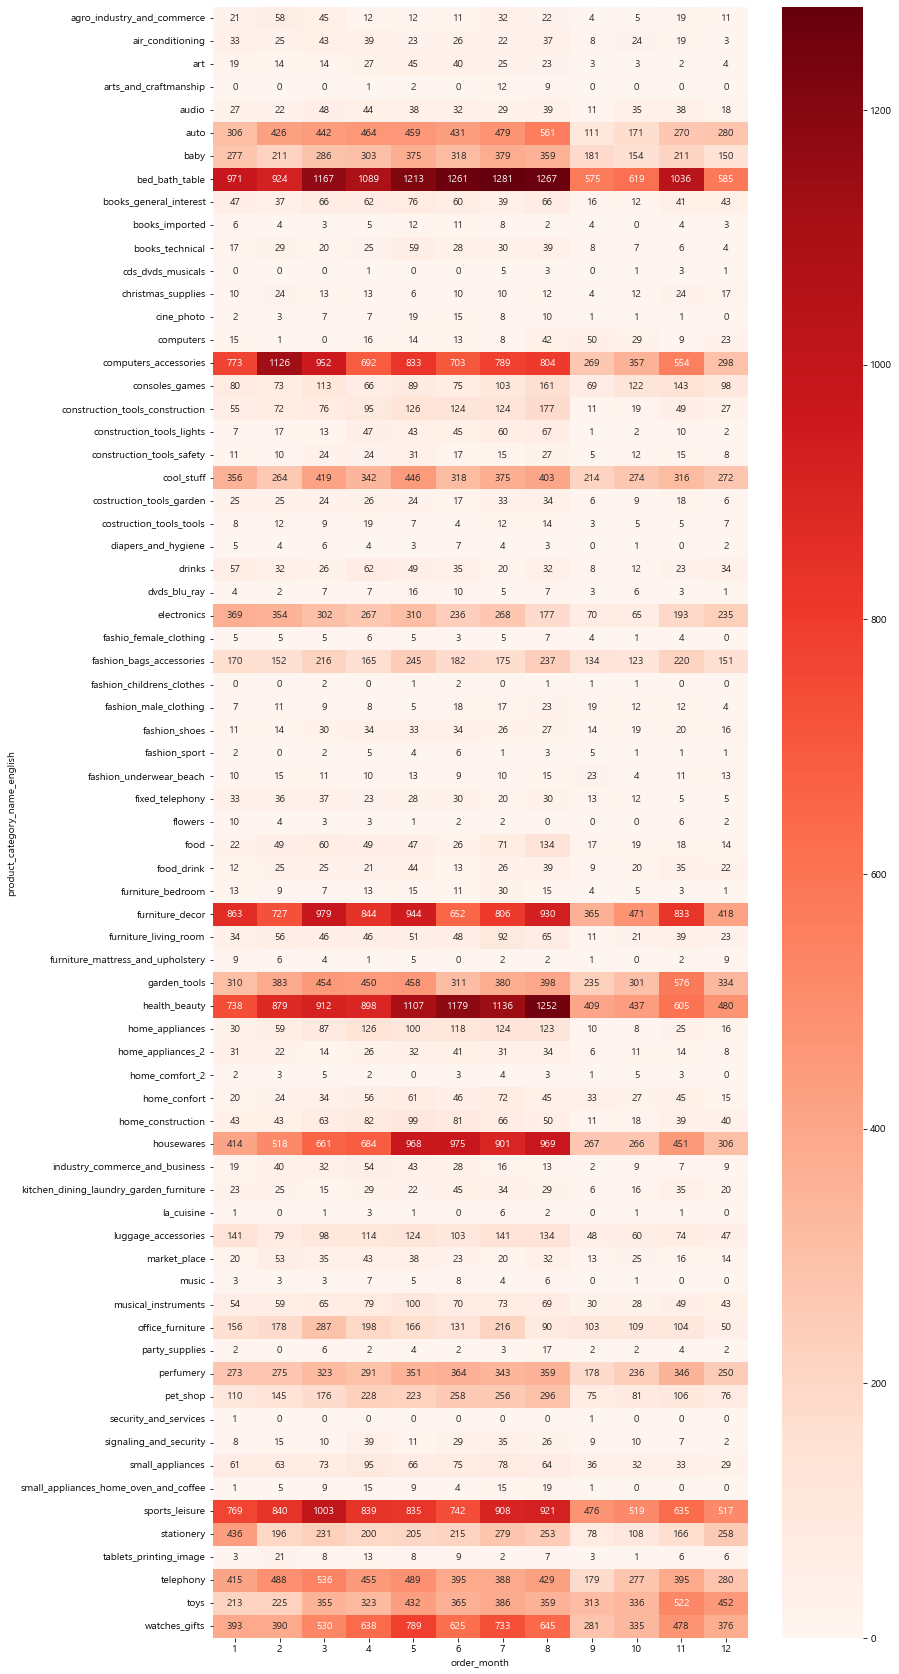

In [23]:
# 히트맵으로 3년간 월 별 어떤 상품이 잘 팔렸는지 
plt.figure(figsize = (12,30))
sns.heatmap(data = m_c,
annot = True,
cmap = 'Reds', fmt = '.0f')

### 히트맵 특이사항 : 11월에 furniture_deco , bed_bath_table 매출이 전/후월대비 높음 -> 크리스마스 준비? 

### 이 때 크리스마스 특별전? 으로 상품 기획해도 괜찮을 듯 
###  7,8월 

### 9월~12월 : 봄 -> 주문이 많이 없네..
### 11월 -> 가든 툴 -> 주문 제일 많음.  봄이라서 ...? 가드닝..? 
### 1월 2월3월 매출 높은 이유 : 2월말 ~3월초 : 락 인 리오 축제 브라질 관광산업의 큰 부분...  -> 얘네는 2월이 여름이지..관광객 젤 많을 떄... 
- 봄 : 9월 22일부터 12월 21일
- 여름 : 12월 22일부터 3월 21일
- 가을 : 3월 22일부터 6월 21일
- 겨울 : 6월 22일부터 9월 21일

### 베드,베스, 테이블 , 가구랑 하우스웨어 가구데코 이런거 주문이 많은 이유는 브라질이 관광국가라서 그런거 같음 
### 그러면 판매량 많은 상품들이 어디로 배송되는지를 보고 관광도시로 가는거면 가설이 타당 
### 이 가설을 토대로 해당 카테고리 상품들 셀러를 더 많이 늘리던지 , 기획전을 한다던지 

## 지역 별 판매량 많은 것 보기

In [24]:
# 지역 데이터 셋을 df에 merge 해주기 
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [25]:
#  그 전에 geolocation_zip_code_prefix 컬럼을 customer_zip_code_prefix 로 바꾸어 주어야... (공통컬럼)
df_geolocation.rename(columns = {'geolocation_zip_code_prefix' : 'customer_zip_code_prefix'}, inplace = True)

In [26]:
# 잘 바뀌었는지 확인
df_geolocation

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [27]:
# 전체 지리정보에서 pp 에 있는 것만 갖고올거니까 innerjoin
pp = pp.merge(df_geolocation, on = 'customer_zip_code_prefix', how = 'inner')
pp.sample(10)

,order_purchase_timestamp,product_category_name,product_category_name_english,customer_zip_code_prefix,order_year,order_month,order_ym,order_day,order_dow,order_hour,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2765293,2018-03-09 22:54:49,eletroportateis,small_appliances,48540,2018,3,2018-03,9,4,22,-9.868426,-38.899362,jeremoabo,BA
8417956,2017-12-18 22:50:21,industria_comercio_e_negocios,industry_commerce_and_business,8290,2017,12,2017-12,18,0,22,-23.559048,-46.456043,sao paulo,SP
12937321,2018-05-25 16:19:08,livros_tecnicos,books_technical,78048,2018,5,2018-05,25,4,16,-15.574994,-56.093951,cuiabá,MT
15027018,2018-02-13 20:10:23,perfumaria,perfumery,72210,2018,2,2018-02,13,1,20,-15.813411,-48.099227,brasilia,DF
10823817,2018-02-25 12:03:56,moveis_decoracao,furniture_decor,1509,2018,2,2018-02,25,6,12,-23.565008,-46.638575,sao paulo,SP
13852950,2017-08-15 15:58:35,ferramentas_jardim,garden_tools,62930,2017,8,2017-08,15,1,15,-5.141701,-38.095457,limoeiro do norte,CE
9862067,2017-12-04 21:26:17,perfumaria,perfumery,88025,2017,12,2017-12,4,0,21,-27.573847,-48.538777,florianopolis,SC
7482360,2018-06-28 20:42:16,brinquedos,toys,29101,2018,6,2018-06,28,3,20,-20.353042,-40.291525,vila velha,ES
17667243,2018-06-28 16:08:26,moveis_decoracao,furniture_decor,19063,2018,6,2018-06,28,3,16,-22.138648,-51.451064,presidente prudente,SP
4900350,2017-04-26 15:31:06,bebes,baby,35790,2017,4,2017-04,26,2,15,-18.756843,-44.432726,curvelo,MG


In [29]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18188636 entries, 0 to 18188635
Data columns (total 14 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_purchase_timestamp       datetime64[ns]
 1   product_category_name          object        
 2   product_category_name_english  object        
 3   customer_zip_code_prefix       int64         
 4   order_year                     int64         
 5   order_month                    int64         
 6   order_ym                       object        
 7   order_day                      int64         
 8   order_dow                      int64         
 9   order_hour                     int64         
 10  geolocation_lat                float64       
 11  geolocation_lng                float64       
 12  geolocation_city               object        
 13  geolocation_state              object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usa

In [30]:
pp.isnull().sum()

order_purchase_timestamp              0
product_category_name            385831
product_category_name_english    389554
customer_zip_code_prefix              0
order_year                            0
order_month                           0
order_ym                              0
order_day                             0
order_dow                             0
order_hour                            0
geolocation_lat                       0
geolocation_lng                       0
geolocation_city                      0
geolocation_state                     0
dtype: int64

In [31]:
# 배송지는 등록되어있는데 어떤 상품인지는 모름 ㅠ 일단 냅두자 
pp[pp['product_category_name'].isnull()]

,order_purchase_timestamp,product_category_name,product_category_name_english,customer_zip_code_prefix,order_year,order_month,order_ym,order_day,order_dow,order_hour,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
882,2018-03-07 20:19:42,NaN,NaN,14409,2018,3,2018-03,7,2,20,-20.509897,-47.397866,franca,SP
883,2018-03-07 20:19:42,NaN,NaN,14409,2018,3,2018-03,7,2,20,-20.497396,-47.399241,franca,SP
884,2018-03-07 20:19:42,NaN,NaN,14409,2018,3,2018-03,7,2,20,-20.510459,-47.399553,franca,SP
885,2018-03-07 20:19:42,NaN,NaN,14409,2018,3,2018-03,7,2,20,-20.480940,-47.394161,franca,SP
886,2018-03-07 20:19:42,NaN,NaN,14409,2018,3,2018-03,7,2,20,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471104,2018-05-03 11:13:38,NaN,NaN,41386,2018,5,2018-05,3,3,11,-12.920709,-38.434508,salvador,BA
17471105,2018-05-03 11:13:38,NaN,NaN,41386,2018,5,2018-05,3,3,11,-12.912943,-38.432380,salvador,BA
17471106,2018-05-03 11:13:38,NaN,NaN,41386,2018,5,2018-05,3,3,11,-12.920746,-38.434066,salvador,BA
17471107,2018-05-03 11:13:38,NaN,NaN,41386,2018,5,2018-05,3,3,11,-12.913163,-38.431686,salvador,BA


In [32]:
#  월별 지역(도시)별 주문건수 어떤지 함 봐보기 
m_gc = pd.crosstab(pp['geolocation_city'],pp['order_month'])
m_gc
# 도시가 5812 개나 있네... 넘 범위가 크니까 주 별로 다시 분석하자 

order_month,1,2,3,4,5,6,7,8,9,10,11,12
geolocation_city,,,,,,,,,,,,
* cidade,0,0,0,1,0,0,0,0,0,0,1,0
...arraial do cabo,3,3,12,4,2,5,1,4,1,3,2,0
abadia dos dourados,0,0,26,0,0,0,26,0,26,0,0,0
abadiania,17,0,0,0,0,0,0,0,0,0,0,0
abadiânia,7,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
álvaro de carvalho,0,0,0,0,2,2,0,0,0,0,0,0
áurea,0,0,0,0,0,2,2,0,0,0,0,0
ângulo,0,4,0,0,0,0,8,0,0,4,0,0


In [33]:
#  월별 지역(state)별 주문건수 어떤지 함 봐보기 
m_gs = pd.crosstab(pp['geolocation_state'],pp['order_month'] )
m_gs

order_month,1,2,3,4,5,6,7,8,9,10,11,12
geolocation_state,,,,,,,,,,,,
AC,820,613,516,790,1329,565,1408,1061,161,708,368,404
AL,3987,3062,5862,6295,4013,2256,2729,2323,1917,3323,1115,1001
AM,439,770,475,846,737,556,1338,484,387,49,359,127
AP,1059,317,630,443,886,438,533,398,110,221,365,298
BA,39266,35918,46424,38069,48066,43434,50682,43323,22985,21836,32771,23200
CE,5892,6071,8145,8434,6751,6696,7881,7191,3566,4229,6149,4094
DF,8548,8928,11177,8939,10926,10541,12655,11622,5703,4578,7837,8320
ES,27602,33613,30620,39749,44235,38441,33332,34323,16347,20003,32431,17145
GO,14401,15654,16717,12776,15976,13782,16962,17452,8655,9320,10936,10577


In [34]:
m_gs.style.background_gradient()

order_month,1,2,3,4,5,6,7,8,9,10,11,12
geolocation_state,,,,,,,,,,,,
AC,820,613,516,790,1329,565,1408,1061,161,708,368,404
AL,3987,3062,5862,6295,4013,2256,2729,2323,1917,3323,1115,1001
AM,439,770,475,846,737,556,1338,484,387,49,359,127
AP,1059,317,630,443,886,438,533,398,110,221,365,298
BA,39266,35918,46424,38069,48066,43434,50682,43323,22985,21836,32771,23200
CE,5892,6071,8145,8434,6751,6696,7881,7191,3566,4229,6149,4094
DF,8548,8928,11177,8939,10926,10541,12655,11622,5703,4578,7837,8320
ES,27602,33613,30620,39749,44235,38441,33332,34323,16347,20003,32431,17145
GO,14401,15654,16717,12776,15976,13782,16962,17452,8655,9320,10936,10577


<AxesSubplot:xlabel='order_month', ylabel='geolocation_state'>

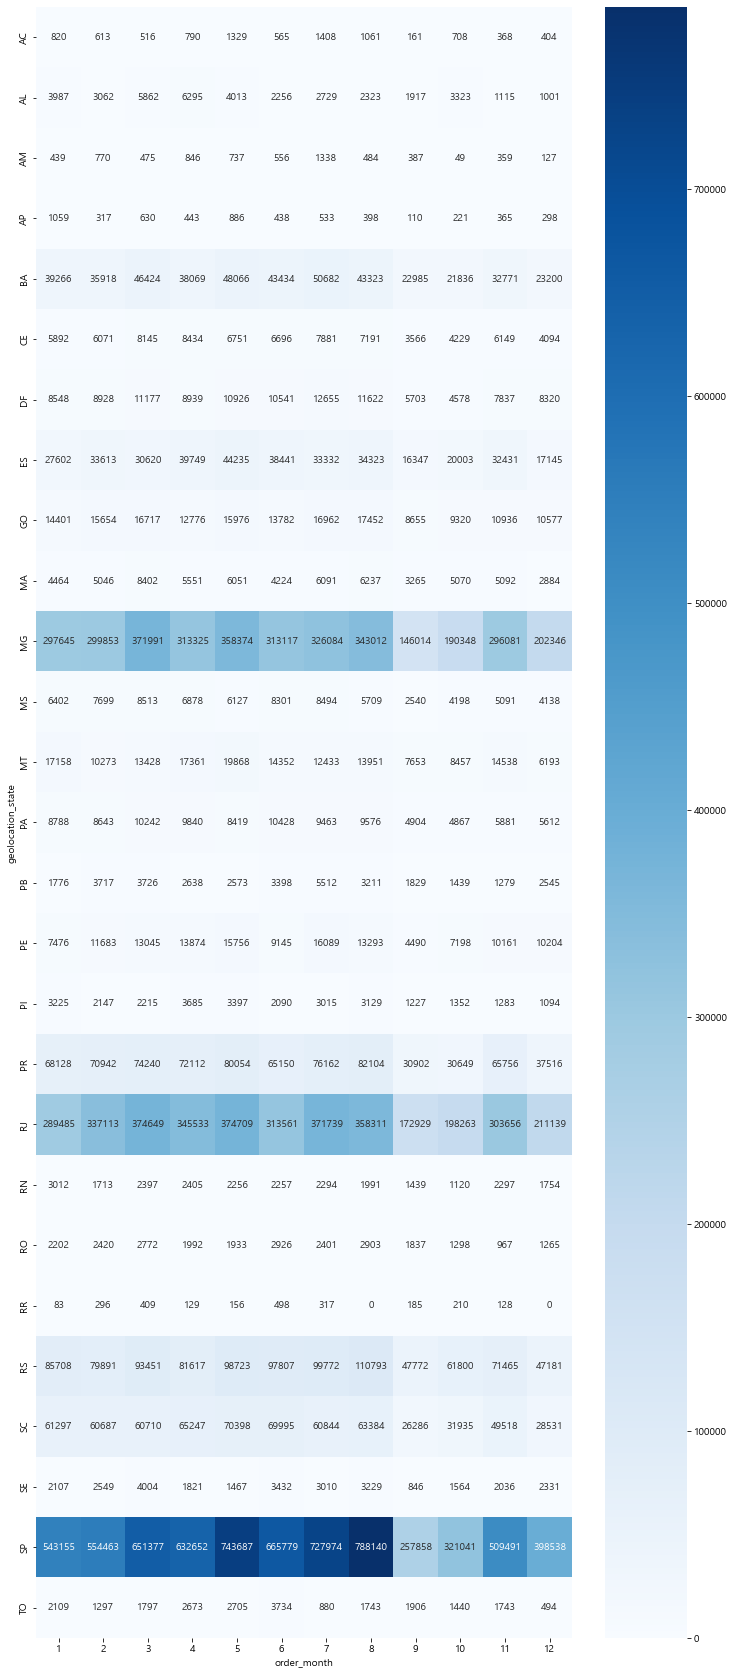

In [35]:
# 히트맵으로 3년간의 월별 / 지역별 어디가 주문 젤 많은지 
plt.figure(figsize = (12,30))
sns.heatmap(data = m_gs,
annot = True,
cmap = 'Blues', fmt = '.0f')

# q분석 결과 : sp / mg / rj 주가 주문이 제일 많음 

In [36]:
#  상품별 지역별 주문건수 어떤지 함 봐보기 
p_gs = pd.crosstab(pp['product_category_name_english'], pp['geolocation_state'] )
p_gs

geolocation_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
product_category_name_english,,,,,,,,,,,,,,,,,,,,,,,,,,,
agro_industry_and_commerce,0,82,0,73,590,500,0,673,215,7,6909,427,362,37,104,214,33,1285,6931,0,384,0,1003,669,0,19351,0
air_conditioning,0,52,37,0,964,61,180,1054,265,82,6132,0,420,0,36,112,311,992,16406,0,0,0,2267,1244,0,19801,0
art,0,0,42,116,1319,0,246,55,163,0,3395,45,10,100,72,79,74,890,7172,96,235,0,1927,1243,0,16875,0
arts_and_craftmanship,0,0,0,0,0,0,89,0,0,0,1886,0,0,0,0,0,0,0,0,0,0,0,0,127,0,2321,0
audio,2,232,27,0,1818,442,639,3100,370,63,6484,109,227,11,39,194,148,2551,13139,48,0,0,2251,1802,0,19687,134
auto,585,1809,324,305,16518,2634,4461,12232,5702,2752,116330,2363,7432,5399,994,4918,1399,25710,102805,862,759,27,24863,27445,1713,237076,1018
baby,131,202,153,0,14071,1676,3086,8285,3796,1860,105053,2794,4668,3497,610,2813,854,19382,97603,840,1185,114,32014,13790,412,177179,652
bed_bath_table,90,2132,378,270,36922,4395,10488,39402,19275,2854,348248,7056,7772,3070,1394,6272,2248,59442,408393,1546,873,136,107859,53740,1088,767792,433
books_general_interest,237,220,18,0,1707,433,890,2042,1086,255,16672,224,290,455,305,568,45,4219,12656,1458,19,0,5340,2361,95,32682,135


In [37]:
p_gs.style.background_gradient()

geolocation_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
product_category_name_english,,,,,,,,,,,,,,,,,,,,,,,,,,,
agro_industry_and_commerce,0,82,0,73,590,500,0,673,215,7,6909,427,362,37,104,214,33,1285,6931,0,384,0,1003,669,0,19351,0
air_conditioning,0,52,37,0,964,61,180,1054,265,82,6132,0,420,0,36,112,311,992,16406,0,0,0,2267,1244,0,19801,0
art,0,0,42,116,1319,0,246,55,163,0,3395,45,10,100,72,79,74,890,7172,96,235,0,1927,1243,0,16875,0
arts_and_craftmanship,0,0,0,0,0,0,89,0,0,0,1886,0,0,0,0,0,0,0,0,0,0,0,0,127,0,2321,0
audio,2,232,27,0,1818,442,639,3100,370,63,6484,109,227,11,39,194,148,2551,13139,48,0,0,2251,1802,0,19687,134
auto,585,1809,324,305,16518,2634,4461,12232,5702,2752,116330,2363,7432,5399,994,4918,1399,25710,102805,862,759,27,24863,27445,1713,237076,1018
baby,131,202,153,0,14071,1676,3086,8285,3796,1860,105053,2794,4668,3497,610,2813,854,19382,97603,840,1185,114,32014,13790,412,177179,652
bed_bath_table,90,2132,378,270,36922,4395,10488,39402,19275,2854,348248,7056,7772,3070,1394,6272,2248,59442,408393,1546,873,136,107859,53740,1088,767792,433
books_general_interest,237,220,18,0,1707,433,890,2042,1086,255,16672,224,290,455,305,568,45,4219,12656,1458,19,0,5340,2361,95,32682,135


# 모든 주에서 health_beauty / sport leisure 는 판매가 좋음 
# RJ / RS / SP  MG -> bed_bath_table 판매 제일 많음 

<AxesSubplot:xlabel='geolocation_state', ylabel='product_category_name_english'>

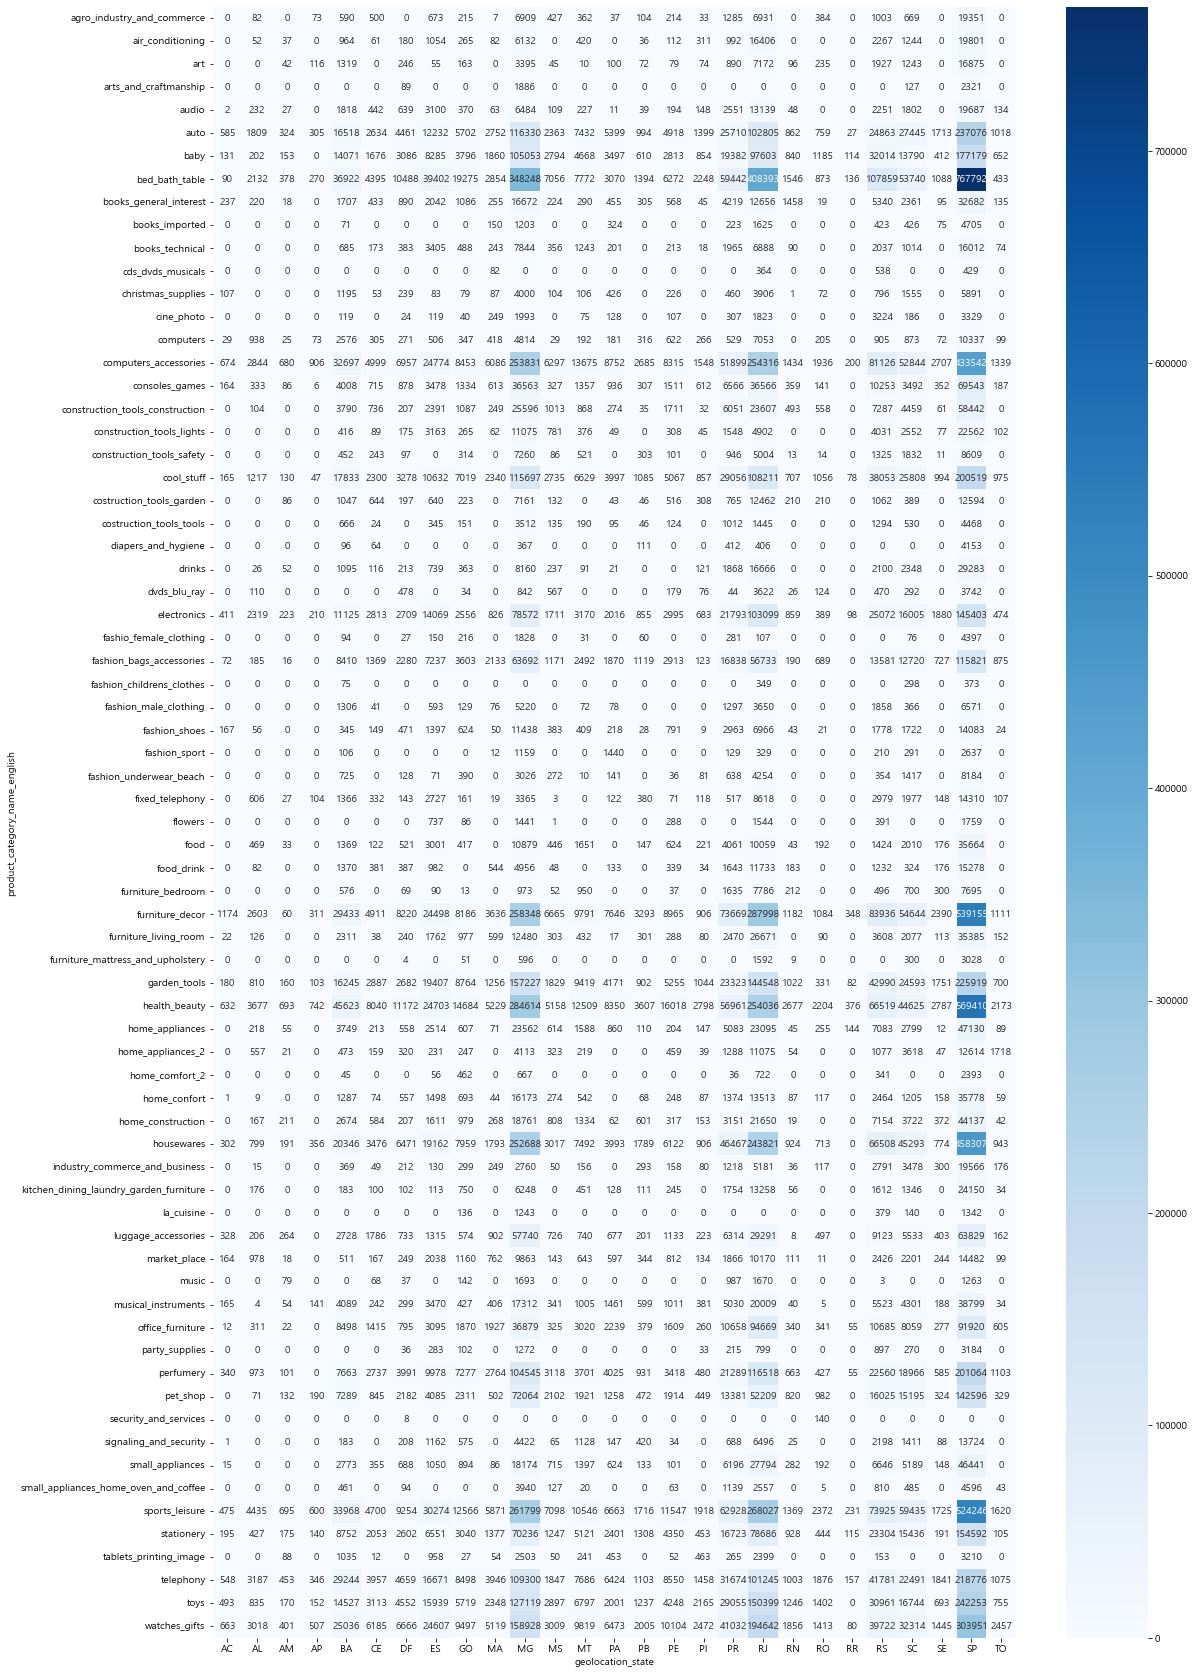

In [38]:
# 히트맵으로 3년간 지역(state)별 어떤 상품이 젤 잘팔렸는지 
plt.figure(figsize = (18,30))
sns.heatmap(data = p_gs,
annot = True,
cmap = 'Blues', fmt = '.0f')

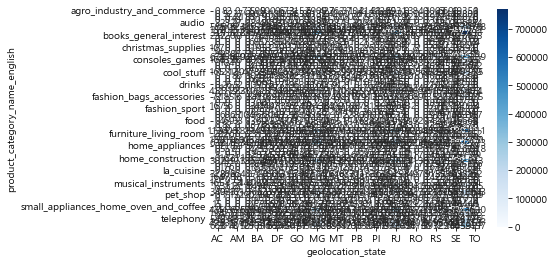

In [43]:
hm = sns.heatmap(data = p_gs,
annot = True,
cmap = 'Blues', fmt = '.0f')

In [ ]:
hm.get_figure().savefig("d:/down/heatmap_02.png")